Multi-Digit data set based on MNIST
=============

data preparation
------------

First we need to download the MNIST dataset. We sue a pickle file from [here](http://deeplearning.net/data/mnist). Then we concatinate them toghether to make a dataset up to 5 digit. The labels for this dataset is classified to 6 class, 1 class for length number and 5 class for each digit.


In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
pickle_file = 'mnist.pkl'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset, train_labels = save[0]
  valid_dataset, valid_labels = save[1]
  test_dataset, test_labels = save[2]
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (50000, 784) (50000,)
Validation set (10000, 784) (10000,)
Test set (10000, 784) (10000,)


Training set (50000, 28, 28) (50000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)
5


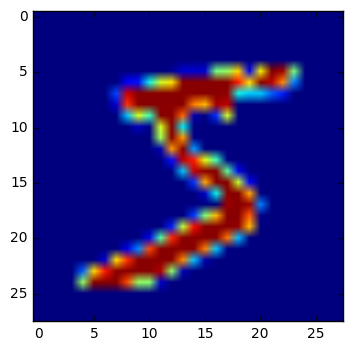

In [3]:
image_size = 28
num_labels = 6

def reformat(dataset):
  dataset = dataset.reshape((-1, image_size, image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  return dataset
train_dataset = reformat(train_dataset)
valid_dataset = reformat(valid_dataset)
test_dataset = reformat(test_dataset)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)
for cnt in range(1):
    print(train_labels[cnt])
    img = train_dataset[cnt]
    plt.figure()
    plt.imshow(img)

In [4]:
blanck_dataset = np.zeros(train_dataset.shape, dtype=np.float32)
blanck_labels = np.ones(train_labels.shape, dtype=np.float32)*10
print('blanck set', blanck_dataset.shape, blanck_labels.shape)
#for n in range(blanck_labels.shape[0]):
#    blanck_labels[n,  10] = 1.

blanck set (50000, 28, 28) (50000,)


---
generate 1-5-length number
---------
Note: The labels for 0-9 digits are 0-9 and for the blanck is 10.
---

Training set (50000, 28, 140) (50000, 5)
Validation set (10000, 28, 140) (10000, 5)
Test set (10000, 28, 140) (10000, 5)
[  5.  10.  10.  10.  10.]


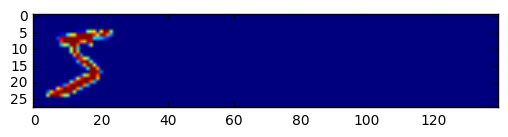

In [5]:
def gen1digNums(dataset, labels):
  bl_dataset = blanck_dataset[:dataset.shape[0]]
  bl_labels = blanck_labels[:dataset.shape[0]]
  return np.concatenate([dataset,bl_dataset,bl_dataset, bl_dataset, bl_dataset], axis=-1), \
         np.column_stack((labels,bl_labels,bl_labels, bl_labels, bl_labels))

train_dataset1, train_labels1 = gen1digNums(train_dataset, train_labels)
test_dataset1, test_labels1 = gen1digNums(test_dataset, test_labels)
valid_dataset1, valid_labels1 = gen1digNums(valid_dataset, valid_labels)
print('Training set', train_dataset1.shape, train_labels1.shape)
print('Validation set', valid_dataset1.shape, valid_labels1.shape)
print('Test set', test_dataset1.shape, test_labels1.shape)
for cnt in range(1):
    print(train_labels1[cnt])
    img = train_dataset1[cnt]
    plt.figure()
    plt.imshow(img)

Training set (50000, 28, 140) (50000, 5)
Validation set (10000, 28, 140) (10000, 5)
Test set (10000, 28, 140) (10000, 5)
[  5.   2.  10.  10.  10.]


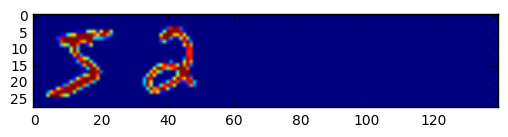

In [7]:
def gen2digNums(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  bl_dataset = blanck_dataset[:dataset.shape[0]]
  bl_labels = blanck_labels[:dataset.shape[0]]
  return np.concatenate([dataset,shuffled_dataset,bl_dataset, bl_dataset, bl_dataset], axis=-1), \
         np.column_stack((labels,shuffled_labels,bl_labels, bl_labels, bl_labels))

train_dataset2, train_labels2 = gen2digNums(train_dataset, train_labels)
test_dataset2, test_labels2 = gen2digNums(test_dataset, test_labels)
valid_dataset2, valid_labels2 = gen2digNums(valid_dataset, valid_labels)
print('Training set', train_dataset2.shape, train_labels2.shape)
print('Validation set', valid_dataset2.shape, valid_labels2.shape)
print('Test set', test_dataset2.shape, test_labels2.shape)
for cnt in range(1):
    print(train_labels2[cnt])
    img = train_dataset2[cnt]
    plt.figure()
    plt.imshow(img)

Training set (50000, 28, 140) (50000, 5)
Validation set (10000, 28, 140) (10000, 5)
Test set (10000, 28, 140) (10000, 5)
[  5.   9.   1.  10.  10.]


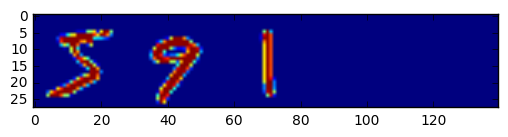

In [8]:
def gen3digNums(dataset, labels):
  permutation1 = np.random.permutation(labels.shape[0])
  shuffled_dataset1 = dataset[permutation1,:,:]
  shuffled_labels1 = labels[permutation1]
  permutation2 = np.random.permutation(labels.shape[0])
  shuffled_dataset2 = dataset[permutation2,:,:]
  shuffled_labels2 = labels[permutation2]
  bl_dataset = blanck_dataset[:dataset.shape[0]]
  bl_labels = blanck_labels[:dataset.shape[0]]
  return np.concatenate([dataset,shuffled_dataset1,shuffled_dataset2, bl_dataset, bl_dataset], axis=-1), \
         np.column_stack((labels,shuffled_labels1,shuffled_labels2, bl_labels, bl_labels))

train_dataset3, train_labels3 = gen3digNums(train_dataset, train_labels)
test_dataset3, test_labels3 = gen3digNums(test_dataset, test_labels)
valid_dataset3, valid_labels3 = gen3digNums(valid_dataset, valid_labels)
print('Training set', train_dataset3.shape, train_labels3.shape)
print('Validation set', valid_dataset3.shape, valid_labels3.shape)
print('Test set', test_dataset3.shape, test_labels3.shape)
for cnt in range(1):
    print(train_labels3[cnt])
    img = train_dataset3[cnt]
    plt.figure()
    plt.imshow(img)

Training set (50000, 28, 140) (50000, 5)
Validation set (10000, 28, 140) (10000, 5)
Test set (10000, 28, 140) (10000, 5)
[  5.   6.   8.   8.  10.]


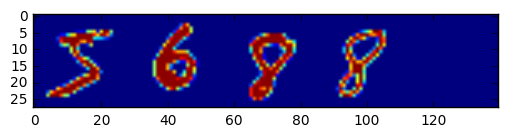

In [9]:
def gen4digNums(dataset, labels):
  permutation1 = np.random.permutation(labels.shape[0])
  shuffled_dataset1 = dataset[permutation1,:,:]
  shuffled_labels1 = labels[permutation1]
  permutation2 = np.random.permutation(labels.shape[0])
  shuffled_dataset2 = dataset[permutation2,:,:]
  shuffled_labels2 = labels[permutation2]
  permutation3 = np.random.permutation(labels.shape[0])
  shuffled_dataset3 = dataset[permutation3,:,:]
  shuffled_labels3 = labels[permutation3]
  bl_dataset = blanck_dataset[:dataset.shape[0]]
  bl_labels = blanck_labels[:dataset.shape[0]]
  return np.concatenate([dataset,shuffled_dataset1,shuffled_dataset2, shuffled_dataset3, bl_dataset], axis=-1), \
         np.column_stack((labels,shuffled_labels1,shuffled_labels2, shuffled_labels3, bl_labels))

train_dataset4, train_labels4 = gen4digNums(train_dataset, train_labels)
test_dataset4, test_labels4 = gen4digNums(test_dataset, test_labels)
valid_dataset4, valid_labels4 = gen4digNums(valid_dataset, valid_labels)
print('Training set', train_dataset4.shape, train_labels4.shape)
print('Validation set', valid_dataset4.shape, valid_labels4.shape)
print('Test set', test_dataset4.shape, test_labels4.shape)
for cnt in range(1):
    print(train_labels4[cnt])
    img = train_dataset4[cnt]
    plt.figure()
    plt.imshow(img)


Training set (50000, 28, 140) (50000, 5)
Validation set (10000, 28, 140) (10000, 5)
Test set (10000, 28, 140) (10000, 5)
[5 5 6 0 7]


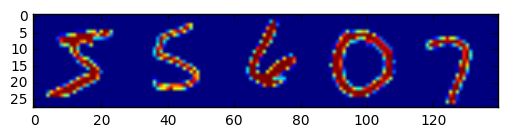

In [10]:
def gen5digNums(dataset, labels):
  permutation1 = np.random.permutation(labels.shape[0])
  shuffled_dataset1 = dataset[permutation1,:,:]
  shuffled_labels1 = labels[permutation1]
  permutation2 = np.random.permutation(labels.shape[0])
  shuffled_dataset2 = dataset[permutation2,:,:]
  shuffled_labels2 = labels[permutation2]
  permutation3 = np.random.permutation(labels.shape[0])
  shuffled_dataset3 = dataset[permutation3,:,:]
  shuffled_labels3 = labels[permutation3]
  permutation4 = np.random.permutation(labels.shape[0])
  shuffled_dataset4 = dataset[permutation4,:,:]
  shuffled_labels4 = labels[permutation4]
  return np.concatenate([dataset,shuffled_dataset1,shuffled_dataset2, shuffled_dataset3, shuffled_dataset4], axis=-1), \
         np.column_stack((labels,shuffled_labels1,shuffled_labels2, shuffled_labels3, shuffled_labels4))

train_dataset5, train_labels5 = gen5digNums(train_dataset, train_labels)
test_dataset5, test_labels5 = gen5digNums(test_dataset, test_labels)
valid_dataset5, valid_labels5 = gen5digNums(valid_dataset, valid_labels)
print('Training set', train_dataset4.shape, train_labels4.shape)
print('Validation set', valid_dataset4.shape, valid_labels4.shape)
print('Test set', test_dataset4.shape, test_labels4.shape)
for cnt in range(1):
    print(train_labels5[cnt])
    img = train_dataset5[cnt]
    plt.figure()
    plt.imshow(img)


In [15]:
def addLenLabel(labels,Len):
    lenLabel = np.ones(labels.shape[0], dtype=np.int32) * Len
    return np.column_stack((lenLabel,labels)) 

train_labels1 = addLenLabel(train_labels1, 1)
test_labels1 = addLenLabel(test_labels1, 1)
valid_labels1 = addLenLabel(valid_labels1, 1)
train_labels2 = addLenLabel(train_labels2, 2)
test_labels2 = addLenLabel(test_labels2, 2)
valid_labels2 = addLenLabel(valid_labels2, 2)
train_labels3 = addLenLabel(train_labels3, 3)
test_labels3 = addLenLabel(test_labels3, 3)
valid_labels3 = addLenLabel(valid_labels3, 3)
train_labels4 = addLenLabel(train_labels4, 4)
test_labels4 = addLenLabel(test_labels4, 4)
valid_labels4 = addLenLabel(valid_labels4, 4)
train_labels5 = addLenLabel(train_labels5, 5)
test_labels5 = addLenLabel(test_labels5, 5)
valid_labels5 = addLenLabel(valid_labels5, 5)

In [16]:
train_dataset = np.concatenate([train_dataset1,train_dataset2,train_dataset3, train_dataset4, train_dataset5])
train_labels = np.concatenate([train_labels1,train_labels2,train_labels3, train_labels4, train_labels5])
valid_dataset = np.concatenate([valid_dataset1,valid_dataset2,valid_dataset3, valid_dataset4, valid_dataset5])
valid_labels = np.concatenate([valid_labels1,valid_labels2,valid_labels3, valid_labels4, valid_labels5])
test_dataset = np.concatenate([test_dataset1,test_dataset2,test_dataset3, test_dataset4, test_dataset5])
test_labels = np.concatenate([test_labels1,test_labels2,test_labels3, test_labels4, test_labels5])

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)


Training set (250000, 28, 140) (250000, 6)
Validation set (50000, 28, 140) (50000, 6)
Test set (50000, 28, 140) (50000, 6)


[  2.   1.   6.  10.  10.  10.]


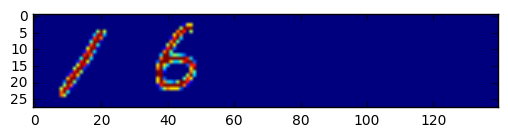

In [17]:
for cnt in range(1):
    print(train_labels[cnt])
    img = train_dataset[cnt]
    plt.figure()
    plt.imshow(img)

Finally, let's save the data for later reuse:

In [ ]:
pickle_file = 'MNIST5digit.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset[:50000],
    'train_labels': train_labels[:50000],
    'valid_dataset': valid_dataset[:10000],
    'valid_labels': valid_labels[:10000],
    'test_dataset': test_dataset[:10000],
    'test_labels': test_labels[:10000],
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [ ]:
import os
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)